# Load data

In [107]:
import pandas as pd
df = pd.read_csv(r'Breast_GSE45827.csv')
df

,samples,type,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,84,basal,9.850040,8.097927,6.424728,7.353027,3.029122,6.880079,4.963740,4.408328,...,12.229711,11.852955,13.658701,13.477698,6.265781,5.016196,4.901594,2.966657,3.508495,3.301999
1,85,basal,9.861357,8.212222,7.062593,7.685578,3.149468,7.542283,5.129607,4.584418,...,12.178531,11.809408,13.750086,13.470146,6.771853,5.291005,5.405839,2.934763,3.687666,3.064299
2,87,basal,10.103478,8.936137,5.735970,7.687822,3.125931,6.562369,4.813449,4.425195,...,12.125108,11.725766,13.621732,13.295080,6.346952,5.171403,5.184286,2.847684,3.550597,3.158535
3,90,basal,9.756875,7.357148,6.479183,6.986624,3.181638,7.802344,5.490982,4.567956,...,12.111235,11.719215,13.743108,13.508861,6.610284,5.193356,5.086569,3.031602,3.524981,3.272665
4,91,basal,9.408330,7.746404,6.693980,7.333426,3.169923,7.610457,5.372469,4.424426,...,12.173642,11.861296,13.797774,13.542206,6.414354,5.040202,5.235318,2.956232,3.445501,3.193947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,230,luminal_B,10.392638,7.334408,6.848586,7.020486,3.228065,7.815439,5.448470,4.496955,...,12.638556,12.122129,14.331152,14.133976,8.495888,4.971727,6.209136,2.852852,3.697448,3.333289
147,233,luminal_B,10.930875,8.415294,5.906827,7.753572,3.270557,7.367931,5.906849,5.194349,...,12.523507,11.977970,14.285405,14.070989,8.193182,6.528948,7.108210,2.929800,3.833289,3.213893
148,236,luminal_B,11.027098,7.180876,6.304736,7.641197,3.206950,8.569296,5.823146,4.617309,...,12.256767,11.661126,14.149586,13.977076,8.351331,6.882504,7.329545,3.085127,3.628848,3.215807
149,237,luminal_B,10.444395,7.525153,5.964460,7.825939,3.384147,7.268454,5.245072,5.088004,...,12.321900,11.727694,14.186277,13.943521,7.927210,6.839086,7.089259,3.018525,3.770597,3.102298


In [99]:
# split dataframe to label and feature
label = df["type"]
feature = df.iloc[:, 2:]

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Columns: 54677 entries, samples to AFFX-TrpnX-M_at
dtypes: float64(54675), int64(1), object(1)
memory usage: 63.0+ MB


In [4]:
df.type.isnull().sum()

0

In [5]:
Freq = list(df["type"].value_counts())
Freq

[41, 30, 30, 29, 14, 7]

In [6]:
Type = list(df["type"].unique())
Type

['basal', 'HER', 'cell_line', 'normal', 'luminal_A', 'luminal_B']

Text(0, 0.5, 'Number of beast cancer')

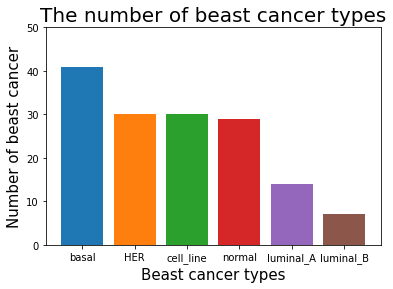

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import seaborn as sns

def addlabels(Type,Freq):
    for i in range(len(Type)):
        
        plt.text(i,Freq[i],Freq[i],  ha = 'center', fontweight='bold',fontsize=13)

column = ['HER', 'cell_line', 'normal', 'luminal_A', 'luminal_B']

colors = list(mcolors.TABLEAU_COLORS.values())
plt.bar(Type, Freq , color = colors, )
#plt.legend(column, loc='center left', bbox_to_anchor=(1.02, 0.5), prop={'size': 5})

plt.rcParams['figure.figsize'] = [10 , 7]
plt.rc('xtick', labelsize= 14)
plt.ylim(0, 50)

#addlabels(Type, Freq)

plt.title("The number of beast cancer types", fontsize=20)
plt.xlabel("Beast cancer types" ,fontsize=15)
plt.ylabel("Number of beast cancer" ,fontsize=15)

# Oversampling

In [8]:
# example of oversampling a multi-class classification dataset
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

y = LabelEncoder().fit_transform(label)
# transform the dataset
oversample = SMOTE()
feature, label = oversample.fit_resample(feature, label)

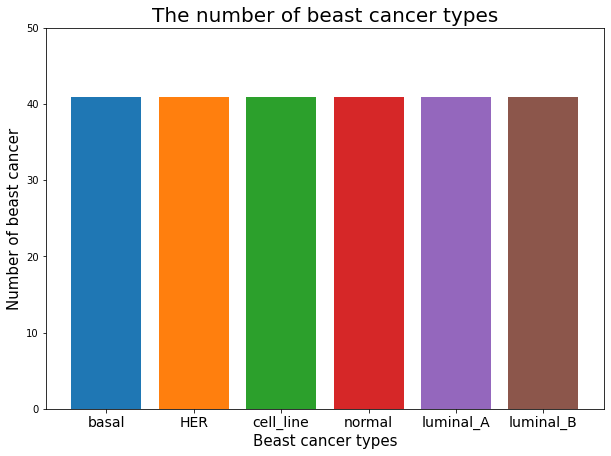

In [84]:
# plot the distribution
counter = Counter(label)

colors = list(mcolors.TABLEAU_COLORS.values())
pyplot.bar(counter.keys(), counter.values(), color = colors)

plt.rcParams['figure.figsize'] = [10 , 7]
plt.rc('xtick', labelsize= 14)
plt.ylim(0, 50)

#addlabels(Type, Freq)

plt.title("The number of beast cancer types", fontsize=20)
plt.xlabel("Beast cancer types" ,fontsize=15)
plt.ylabel("Number of beast cancer" ,fontsize=15)

pyplot.show()

# Linear PCA

In [10]:
# standardizing feature

from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
feature_scaled = pd.DataFrame(std_scaler.fit_transform(feature), columns = feature.columns)
feature_scaled.head()

,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,-0.720880,0.662507,0.578884,-0.098257,-1.081939,-0.665365,-1.265976,-1.066488,0.802326,-1.434363,...,-0.477984,-0.108579,-1.538598,-1.167892,-1.766648,-0.872252,-1.595380,0.373396,-0.757010,1.173599
1,-0.702891,0.800873,1.538665,0.824275,-0.326821,0.289757,-0.756457,-0.482145,0.088313,-0.692557,...,-0.594975,-0.194902,-1.208989,-1.191483,-1.230007,-0.533662,-1.036025,0.055850,0.332997,-1.257441
2,-0.318031,1.677247,-0.457476,0.830499,-0.474503,-1.123610,-1.727646,-1.010515,1.156491,-0.781800,...,-0.717094,-0.360711,-1.671935,-1.738330,-1.680574,-0.681022,-1.281792,-0.811163,-0.500878,-0.293653
3,-0.868969,-0.234284,0.660821,-1.114701,-0.124969,0.664854,0.353631,-0.536772,0.900428,-1.354209,...,-0.748808,-0.373697,-1.234159,-1.070550,-1.401336,-0.653974,-1.390188,1.020024,-0.656714,0.873590
4,-1.422995,0.236951,0.984022,-0.152633,-0.198473,0.388088,-0.010423,-1.013068,1.144905,-1.221072,...,-0.606151,-0.092043,-1.036989,-0.966391,-1.609100,-0.842674,-1.225182,0.269597,-1.140237,0.068519


In [11]:
import numpy as np
from sklearn.decomposition import PCA

# the amount of variance needed to be explained 
# is greater than the percentage specified by n_components.
pca = PCA(n_components = 0.80)

# fit feature_scaled
pca.fit(feature_scaled)

# percentage of variance explained by each components
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))

Cumulative Variances (Percentage):
[16.75872916 31.13832112 35.79659448 39.42561373 42.49057705 45.40304828
 47.3190023  49.09989549 50.73559434 52.2293812  53.58065382 54.8536602
 56.08068263 57.26551321 58.35691733 59.34473567 60.24519256 61.10933774
 61.95431734 62.76965651 63.50767116 64.22915059 64.94810665 65.63292083
 66.29935107 66.93704885 67.53112229 68.10872722 68.68122113 69.23530929
 69.77370977 70.29990211 70.82302028 71.33125547 71.82295425 72.30991042
 72.79221923 73.27020935 73.73141794 74.17393012 74.6076646  75.03511276
 75.45563405 75.87413302 76.28497987 76.6945779  77.09297666 77.48296582
 77.86680141 78.24711213 78.62419842 78.99655557 79.35754417 79.71401142
 80.06865704]


In [12]:
# number of components explaining greater than 85% of variation
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

Number of components: 55


Text(0, 0.5, 'Explained variance (%)')

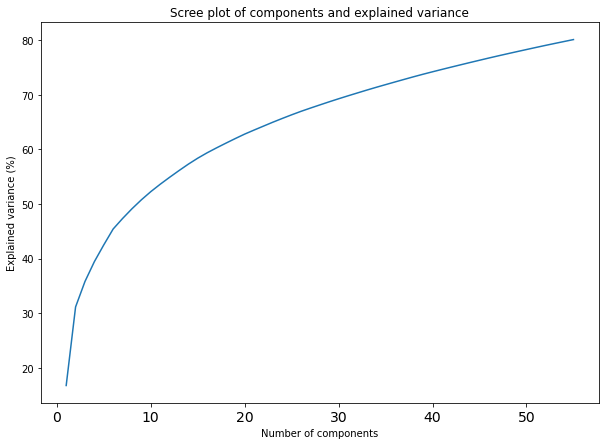

In [13]:
import matplotlib.pyplot as plt

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.title("Scree plot of components and explained variance")
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [55]:
pca_components = abs(pca.components_)
print(pca.components_)

[[ 5.77309291e-05 -5.95411460e-03 -4.91635849e-03 ... -9.56746691e-06
  -3.39873723e-04  7.62988902e-04]
 [-3.71459820e-03  7.82542916e-03 -5.74180148e-03 ...  6.47518542e-03
   7.88205671e-03  4.20032065e-03]
 [ 5.65994608e-03 -1.10548506e-03 -1.81901566e-03 ...  5.37798491e-03
   2.79947501e-03  4.23386835e-03]
 ...
 [-7.53037292e-04  2.29186637e-03 -6.16355740e-03 ... -8.93796486e-03
  -2.05638770e-03  4.13444142e-03]
 [ 5.31625353e-03  2.93523126e-03 -2.91951130e-03 ... -3.86658997e-03
  -6.29928741e-03 -3.67018255e-03]
 [-9.69351898e-04 -2.74984456e-03  1.03236597e-03 ... -5.95708469e-03
   8.51421172e-03 -1.22621081e-03]]


In [15]:
feature_pca = pca.transform(feature_scaled)
print(feature_pca.shape)

feature_pca = pd.DataFrame(feature_pca)
feature_pca

(246, 55)


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-115.654860,42.007029,-88.347961,52.137214,-20.311088,63.639930,-10.352095,-5.569967,-46.306070,-31.234666,...,-13.571965,1.776854,0.919031,34.234022,-19.914473,3.789137,3.111213,-35.810957,13.466846,-14.786325
1,-118.665181,-4.723339,-84.149015,65.568131,-13.783176,34.057328,18.606334,-2.693711,-41.585898,-10.746506,...,32.785901,-2.498251,-16.165796,9.522111,44.260867,-21.823684,10.653309,-22.113227,-9.259468,24.571626
2,-97.603879,78.595880,-85.099549,54.119450,-27.649048,52.281662,30.964667,-7.046743,-57.074773,-26.731481,...,24.346547,72.180105,19.512374,-8.664794,-55.127150,26.903667,-27.591278,11.786069,8.957787,32.324615
3,-110.462542,-0.999549,-82.006259,36.896033,-3.850225,59.002498,-46.540291,29.348518,-43.302719,-24.443828,...,7.503593,-20.265184,-11.540415,6.609478,22.390970,11.161940,-4.108546,3.148815,29.738935,1.881328
4,-125.234305,-3.860086,-75.114147,48.681004,-11.395916,50.975399,-29.558703,6.303304,-38.012564,-29.342874,...,-0.055718,-14.858512,-8.432879,15.560096,-0.360982,-6.112218,3.889425,-5.964648,-3.605803,-8.609210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,240.891688,-11.457410,-49.903886,-26.280180,-24.522722,30.409406,3.503365,-11.902731,1.362068,20.481668,...,3.678097,-1.228950,4.999352,-0.476002,-1.778077,-0.803255,5.457800,0.510603,2.251444,-2.860750
242,164.709588,-66.770589,-17.631669,27.404105,-0.088979,-11.047233,-5.301351,0.491736,20.325695,-32.369372,...,-2.713677,4.249483,-9.015214,-0.446570,7.384696,-4.950024,-1.851858,0.522894,-0.509319,-3.171253
243,186.120399,-34.244227,-18.752925,87.736541,-28.520716,30.602580,-21.848381,-19.229114,1.276860,4.194859,...,-7.080401,3.944737,-4.524413,13.619269,11.050593,-7.509900,-6.425666,-7.069716,-5.187669,-1.101324
244,214.579276,-24.238954,-12.718021,-20.381031,31.656818,8.262061,24.151150,32.689979,-3.769997,-27.322457,...,6.441993,1.250457,1.989180,-5.362111,-0.390269,-0.142669,0.904737,-1.093436,4.363287,-4.900123


# Splitting data

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(feature_pca, label, test_size = 0.3, random_state = 17)

In [26]:
pd.crosstab(y_train, columns='N', normalize=True)

col_0,N
type,
HER,0.180233
basal,0.168605
cell_line,0.151163
luminal_A,0.156977
luminal_B,0.168605
normal,0.174419


In [27]:
pd.crosstab(y_test, columns='N', normalize=True)

col_0,N
type,
HER,0.135135
basal,0.162162
cell_line,0.202703
luminal_A,0.189189
luminal_B,0.162162
normal,0.148649


# Modeling

### Logistic regression

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

Logres_classifier = LogisticRegression()

lr_params = dict()
lr_params['C'] = [0.001, 0.1, 100, 1000]
lr_params["solver"] = [
    'liblinear',
    'newton-cg',
    'lbfgs',
    'sag',
    'saga']
lr_params['max_iter'] = [ 5000, 10000]

gridsearch_lr = GridSearchCV(
    Logres_classifier,
    lr_params,
    scoring = 'accuracy',
    verbose = 2)
gridsearch_lr.fit(x_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END ...........C=0.001, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.001, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.001, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.001, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.001, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.001, max_iter=5000, solver=newton-cg; total time=   0.1s
[CV] END ...........C=0.001, max_iter=5000, solver=newton-cg; total time=   0.1s
[CV] END ...........C=0.001, max_iter=5000, solver=newton-cg; total time=   0.1s
[CV] END ...........C=0.001, max_iter=5000, solver=newton-cg; total time=   0.1s
[CV] END ...........C=0.001, max_iter=5000, solver=newton-cg; total time=   0.1s
[CV] END ...............C=0.001, max_iter=5000, solver=lbfgs; total time=   0.1s
[CV] END ...............C=0.001, max_iter=5000,

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 100, 1000],
                         'max_iter': [5000, 10000],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=2)

In [76]:
print('Best Hyperparameters: %s' % gridsearch_lr.best_params_)

Best Hyperparameters: {'C': 0.001, 'max_iter': 10000, 'solver': 'saga'}


In [80]:
gridsearch_lr.best_estimator_

LogisticRegression(C=0.001, max_iter=10000, solver='saga')

In [77]:
lr = gridsearch_lr.best_estimator_

acc = round(lr.score(x_train, y_train) * 100, 4)
acc_test = round(lr.score(x_test, y_test) * 100, 4)
print(acc, acc_test)

100.0 94.5946


In [90]:
lr = LogisticRegression(C = 0.001,
                        max_iter = 10000,
                        solver = "saga")

lr.fit(x_train, y_train)
lr.score(x_test, y_test)

0.9459459459459459

### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

Randfor_classifier = RandomForestClassifier()

rf_params = dict()
rf_params['n_estimators'] = [100, 200, 300]
rf_params['max_depth'] = [2, 8, 16, None]
rf_params["max_features"] = ['auto', 'sqrt']
rf_params["min_samples_leaf"] = [1, 3]
rf_params["min_samples_split"] = [2, 5, 10]
rf_params["criterion"] = ["gini", "entropy"]
rf_params['class_weight'] = ['balanced','balanced_subsample']
rf_params['bootstrap'] = [True]

In [33]:
gridsearch_rf = GridSearchCV(
    Randfor_classifier,
    rf_params,
    scoring='accuracy',
    verbose = 2)
gridsearch_rf.fit(x_train, y_train)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END bootstrap=True, class_weight=balanced, criterion=gini, ma

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True],
                         'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 8, 16, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [34]:
print('Best Hyperparameters: %s' % gridsearch_rf.best_params_)

Best Hyperparameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 16, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [79]:
gridsearch_rf.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [35]:
rf = gridsearch_rf.best_estimator_

acc = round(rf.score(x_train, y_train) * 100, 4)
acc_test = round(rf.score(x_test, y_test) * 100, 4)
print(acc, acc_test)

100.0 95.9459


In [94]:
rf = RandomForestClassifier(bootstrap = True,
                            class_weight = 'balanced',
                            criterion = 'gini',
                            max_depth = 16,
                            max_features = 'auto',
                            min_samples_leaf = 1,
                            min_samples_split = 10,
                            n_estimators = 300)

rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.972972972972973

## Evaluation

In [37]:
from sklearn.metrics import classification_report

In [38]:
lr_result = lr.predict(x_test)
print(classification_report(y_true=y_test, y_pred=lr_result))

              precision    recall  f1-score   support

         HER       0.91      1.00      0.95        10
       basal       1.00      0.92      0.96        12
   cell_line       1.00      1.00      1.00        15
   luminal_A       0.92      0.86      0.89        14
   luminal_B       0.85      0.92      0.88        12
      normal       1.00      1.00      1.00        11

    accuracy                           0.95        74
   macro avg       0.95      0.95      0.95        74
weighted avg       0.95      0.95      0.95        74



In [39]:
rf_result = rf.predict(x_test)
print(classification_report(y_true=y_test, y_pred=rf_result))

              precision    recall  f1-score   support

         HER       1.00      1.00      1.00        10
       basal       1.00      1.00      1.00        12
   cell_line       1.00      1.00      1.00        15
   luminal_A       1.00      0.93      0.96        14
   luminal_B       0.85      0.92      0.88        12
      normal       0.91      0.91      0.91        11

    accuracy                           0.96        74
   macro avg       0.96      0.96      0.96        74
weighted avg       0.96      0.96      0.96        74

